Importing all libraries

In [27]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

Loading the dataset

In [3]:
dataset=pd.read_csv("genders.csv")
dataset.head()

,name,gender,count
0,aabha,female,3
1,aabhas,male,2
2,aabhash,male,4
3,aabhesh,male,2
4,aabhusan,male,2


In [4]:
dataset=dataset.drop("count",axis=1)
dataset.head()

,name,gender
0,aabha,female
1,aabhas,male
2,aabhash,male
3,aabhesh,male
4,aabhusan,male


In [5]:
dataset.shape

(8327, 2)

Exploratory data analysis

In [6]:
print(len(dataset['name'].unique()))

7547


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


([<matplotlib.axis.XTick at 0x2c41ed40fd0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

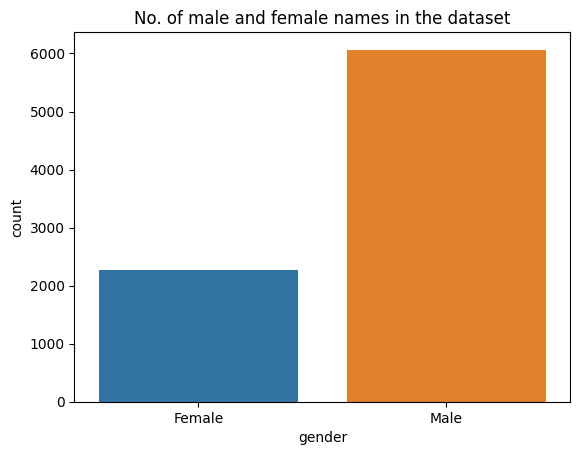

In [7]:
sns.countplot(x='gender',data = dataset)

plt.title('No. of male and female names in the dataset')

plt.xticks([0,1],('Female','Male'))

Starting letter of the names

In [8]:
alphabets= ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',

            'q','r','s','t','u','v','w','x','y','z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(dataset[dataset['name'].str.startswith(i)])

print(startletter_count)

{'a': 958, 'b': 663, 'c': 164, 'd': 432, 'e': 75, 'f': 25, 'g': 168, 'h': 150, 'i': 86, 'j': 283, 'k': 381, 'l': 152, 'm': 442, 'n': 462, 'o': 44, 'p': 679, 'q': 2, 'r': 701, 's': 1888, 't': 210, 'u': 125, 'v': 69, 'w': 10, 'x': 0, 'y': 148, 'z': 10}


Text(0.5, 1.0, 'Number of names starting with each letter')

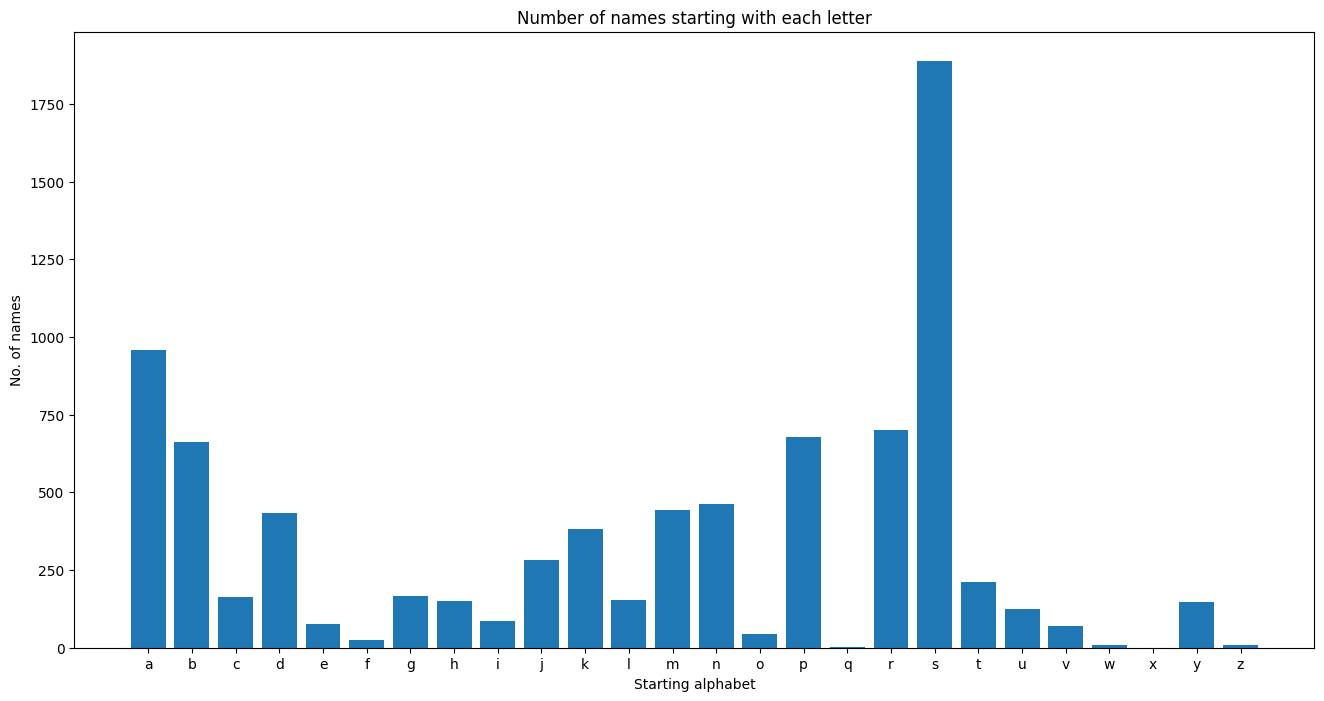

In [9]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [10]:
print('The 5 most name starting letters are : ',

       *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])

The 5 most name starting letters are :  ('s', 1888) ('a', 958) ('r', 701) ('p', 679) ('b', 663)


Ending letter of the names

In [11]:
endletter_count={}

for i in alphabets:

    endletter_count[i]=len(dataset[dataset['name'].str.endswith(i)])
print(endletter_count)


{'a': 2687, 'b': 97, 'c': 9, 'd': 152, 'e': 156, 'f': 12, 'g': 77, 'h': 766, 'i': 684, 'j': 199, 'k': 173, 'l': 422, 'm': 275, 'n': 934, 'o': 29, 'p': 124, 'q': 5, 'r': 426, 's': 121, 't': 363, 'u': 315, 'v': 111, 'w': 10, 'x': 4, 'y': 137, 'z': 30}


Text(0.5, 1.0, 'No of names ending with each letter')

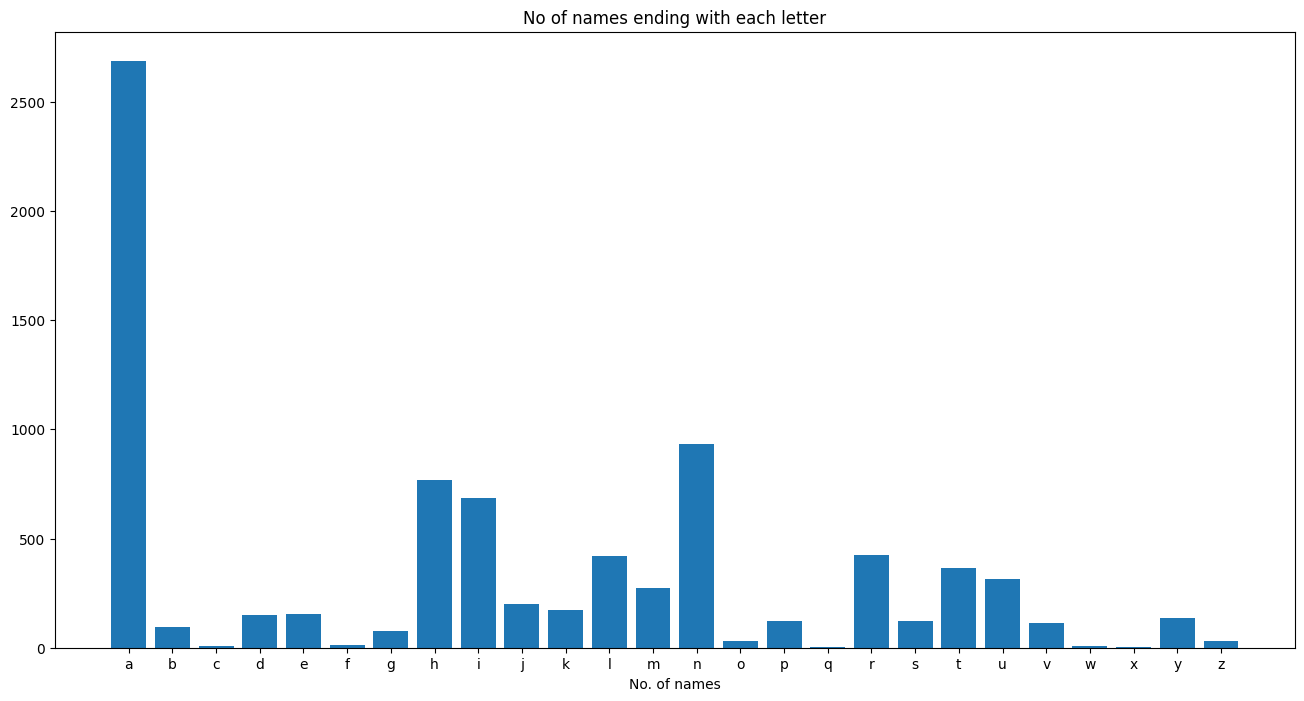

In [12]:
plt.figure(figsize=(16,8))
plt.bar(endletter_count.keys(),endletter_count.values())
plt.xlabel("Ending alphabet")
plt.xlabel("No. of names")
plt.title("No of names ending with each letter")

In [13]:
print('The 5 most name endind letters are : ', *sorted(endletter_count.items(),

        key=lambda item: item[1])[-5:][::-1])

The 5 most name endind letters are :  ('a', 2687) ('n', 934) ('h', 766) ('i', 684) ('r', 426)


Checking the most frequent letter names begin with, visually

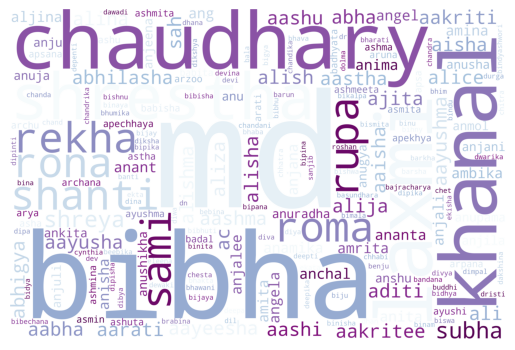

In [14]:
text=" ".join(i for i in dataset.name)
word_cloud=WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="white",
    colormap="BuPu",
    collocations=False,
).generate(text)

plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Data preprocessing

In [15]:
X=list(dataset['name'])
y=list(dataset['gender'])

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='char')
X=cv.fit_transform(X).toarray()

Splitting the train and test data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=44)

Linear Regression model

In [19]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_lr_model=lr_model.predict(X_test)

Naive Bayes Model

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
y_nb_model=nb_model.predict(X_test)

XGBoost Model

In [21]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_xgb_model=xgb_model.predict(X_test)

Model evaluation

In [22]:
from sklearn.metrics import confusion_matrix

def cmatrix(model):
    y_pred=model.predict(X_test)
    cmatrix=confusion_matrix(y_test,y_pred)
    print(cmatrix)

    sns.heatmap(cmatrix,cmap="BuPu",annot=True)
    plt.xlabel("Predicted values")
    plt.ylabel("Actual values")
    plt.title("Confusion matrix")

In [23]:
import sklearn.metrics as metrics

Evaluating the Linear Regression model

0.7441775836972343
              precision    recall  f1-score   support

           0       0.55      0.23      0.33       736
           1       0.77      0.93      0.84      2012

    accuracy                           0.74      2748
   macro avg       0.66      0.58      0.58      2748
weighted avg       0.71      0.74      0.70      2748

[[ 170  566]
 [ 137 1875]]
None


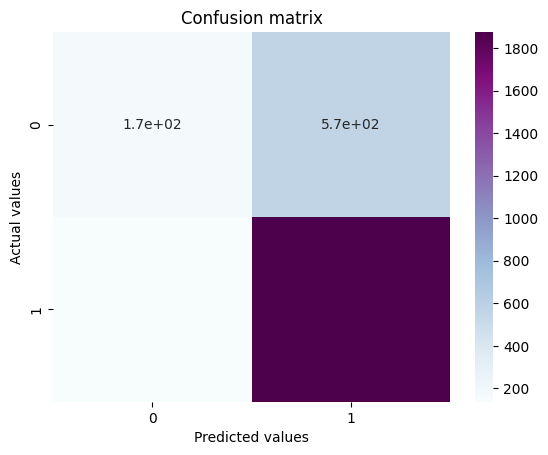

In [24]:
print(metrics.accuracy_score(y_test,y_lr_model))
print(metrics.classification_report(y_test,y_lr_model))
print(cmatrix(lr_model))

Evaluating the Naive Bayes Model

0.7307132459970888
              precision    recall  f1-score   support

           0       0.40      0.01      0.02       736
           1       0.73      0.99      0.84      2012

    accuracy                           0.73      2748
   macro avg       0.57      0.50      0.43      2748
weighted avg       0.64      0.73      0.62      2748

[[   8  728]
 [  12 2000]]
None


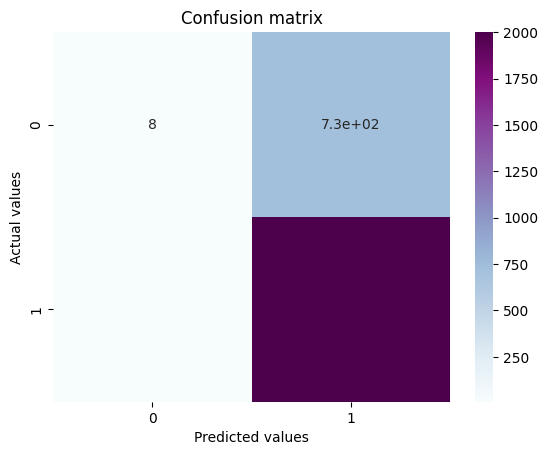

In [25]:
print(metrics.accuracy_score(y_test,y_nb_model))
print(metrics.classification_report(y_test,y_nb_model))
print(cmatrix(nb_model))

Evaluating the XGBoost Model

0.745269286754003
              precision    recall  f1-score   support

           0       0.54      0.35      0.42       736
           1       0.79      0.89      0.84      2012

    accuracy                           0.75      2748
   macro avg       0.66      0.62      0.63      2748
weighted avg       0.72      0.75      0.73      2748

[[ 254  482]
 [ 218 1794]]
None


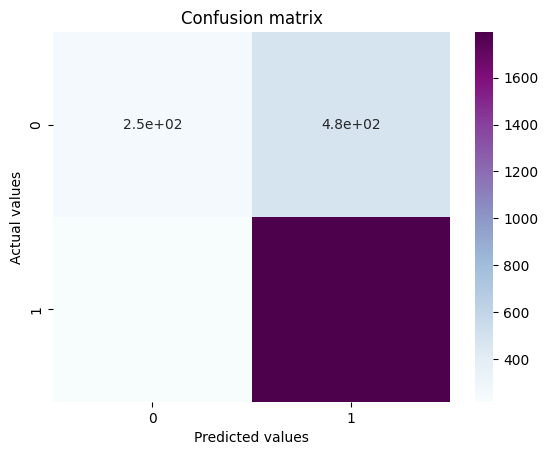

In [26]:
print(metrics.accuracy_score(y_test,y_xgb_model))
print(metrics.classification_report(y_test,y_xgb_model))
print(cmatrix(xgb_model))